<a href="https://colab.research.google.com/github/Adindashyfa/proyek_data_analis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adinda Shyfa Dianissa
- **Email:** m299b4kx0103@bangkit.academy
- **ID Dicoding:** adinda_shyfa

## Menentukan Pertanyaan Bisnis

- Is there a significant correlation between season and the number of bike rentals?
- Does clear, cloudy, rainy, or snowy weather significantly affect the number of bike rentals?
- Does a holiday significantly affect the number of bike rentals?
- How does the day of the week impact the number of bike rentals?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [1]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check if the file exists
file_path = '/content/drive/MyDrive/Bike-sharing-dataset/day.csv'
if os.path.exists(file_path):
  data = pd.read_csv(file_path)
  print(data.head())
else:
  print(f"File not found at {file_path}")

Mounted at /content/drive
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
In the data gathering section, the data collected is the Bike Sharing Data, which contains the number of bike rentals in 2011 and 2012. It also includes additional information such as the day, season, and temperature

### Assessing Data

In [ ]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check if the file exists
file_path = '/content/drive/MyDrive/Bike-sharing-dataset/day.csv'
if os.path.exists(file_path):
  data = pd.read_csv(file_path)
  print(data.head())
else:
  print(f"File not found at {file_path}")

# Use the 'data' DataFrame directly
data.info() # Changed from day_df to data

**Insight:**
At this stage, it was found that there is an error in the data type of dteday, which should be represented as a datetime data type, not as an object (which is used for string data types)

### Cleaning Data

In [ ]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check if the file exists
file_path = '/content/drive/MyDrive/Bike-sharing-dataset/day.csv'
if os.path.exists(file_path):
  data = pd.read_csv(file_path)
  print(data.head())
else:
  print(f"File not found at {file_path}")

# Use the 'data' DataFrame directly
data.info()

datetime_columns = ["dteday"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

data.info()

**Insight:**
In this process, the data type of `dteday` was changed from object to datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check if the file exists
file_path = '/content/drive/MyDrive/Bike-sharing-dataset/day.csv'
if os.path.exists(file_path):
  data = pd.read_csv(file_path)
  print(data.head())
else:
  print(f"File not found at {file_path}")

# Use the 'data' DataFrame directly
data.info() # Changed from day_df to data

datetime_columns = ["dteday"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

data.info()

data.describe(include="all")

**Insight:**
Display the data in table form.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying the total bike rentals based on season
# 'season' has 4 values: 1 (Spring), 2 (Summer), 3 (Fall), 4 (Winter)
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data['season_name'] = data['season'].map(season_mapping)

# Calculating the total number of bike rentals per season
season_counts = data.groupby('season_name')['cnt'].sum().reset_index()

# Displaying the result
print("Total Rentals by Season:")
print(season_counts)

Total Rentals by Season:
  season_name      cnt
0        Fall  1061129
1      Spring   471348
2      Summer   918589
3      Winter   841613


**Insight:**
Group bike rental orders by season.

In [5]:
# Mapping 'weathersit' to descriptive labels for easier interpretation
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds',
    3: 'Light Snow, Light Rain + Thunderstorm, Scattered clouds',
    4: 'Heavy Rain + Ice Pellets, Thunderstorm + Mist, Snow + Fog'
}
data['weather_condition'] = data['weathersit'].map(weather_mapping)

# Calculating total bike rentals per weather condition
weather_counts = data.groupby('weather_condition')['cnt'].sum().reset_index()

# Display the total rentals by weather situation
print("Total Rentals by Weather Situation:")
print(weather_counts)

Total Rentals by Weather Situation:
                                   weather_condition      cnt
0                   Clear, Few clouds, Partly cloudy  2257952
1  Light Snow, Light Rain + Thunderstorm, Scatter...    37869
2  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   996858


**Insight:**
Group bike rental orders by weather.

In [6]:
# Mapping 'holiday' to descriptive labels
holiday_mapping = {0: 'Non-Holiday', 1: 'Holiday'}
data['holiday_status'] = data['holiday'].map(holiday_mapping)

# Calculating total bike rentals based on holiday status
holiday_counts = data.groupby('holiday_status')['cnt'].sum().reset_index()

# Display the total rentals by holiday status
print("Total Rentals by Holiday Status:")
print(holiday_counts)

Total Rentals by Holiday Status:
  holiday_status      cnt
0        Holiday    78435
1    Non-Holiday  3214244


**Insight:**
Group bike rental orders by holiday.

In [7]:
# Mapping weekday to its name
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
data['weekday_name'] = data['weekday'].map(weekday_mapping)

# Calculate total rentals by weekday
weekday_counts = data.groupby('weekday_name')['cnt'].sum().reset_index()

# Display the total rentals by weekday
print("Total Rentals by Weekday:")
print(weekday_counts)

Total Rentals by Weekday:
  weekday_name     cnt
0       Friday  487790
1       Monday  455503
2     Saturday  477807
3       Sunday  444027
4     Thursday  485395
5      Tuesday  469109
6    Wednesday  473048


**Insight:**
Group bike rental orders by weekday.

## Visualization & Explanatory Analysis

<ipython-input-8-3c1a58838be8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=season_counts, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

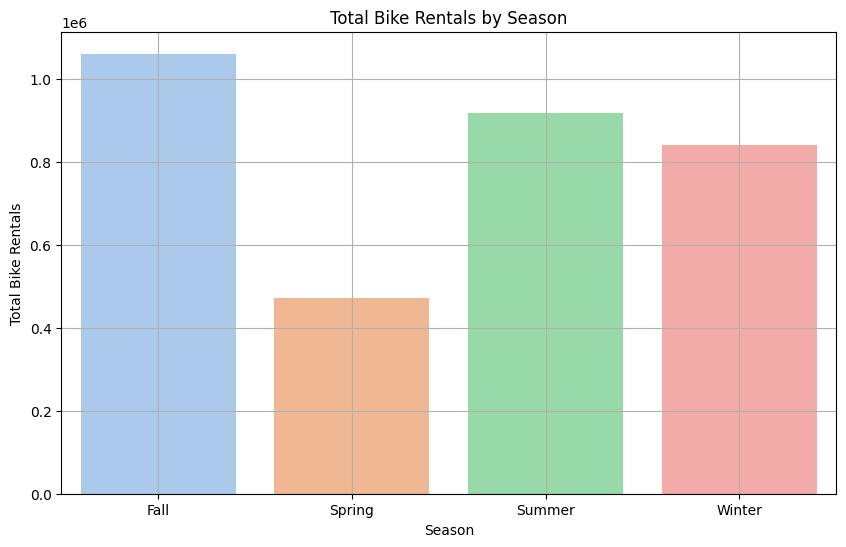

In [8]:
# Visualizing the total number of rentals by season
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt', data=season_counts, palette='pastel')

plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=0)  # Rotate x-ticks for better visibility
plt.grid(True)
plt.show()

<ipython-input-9-915248d00478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='cnt', data=weather_counts, palette='coolwarm') # Changed x to 'weather_condition'
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_

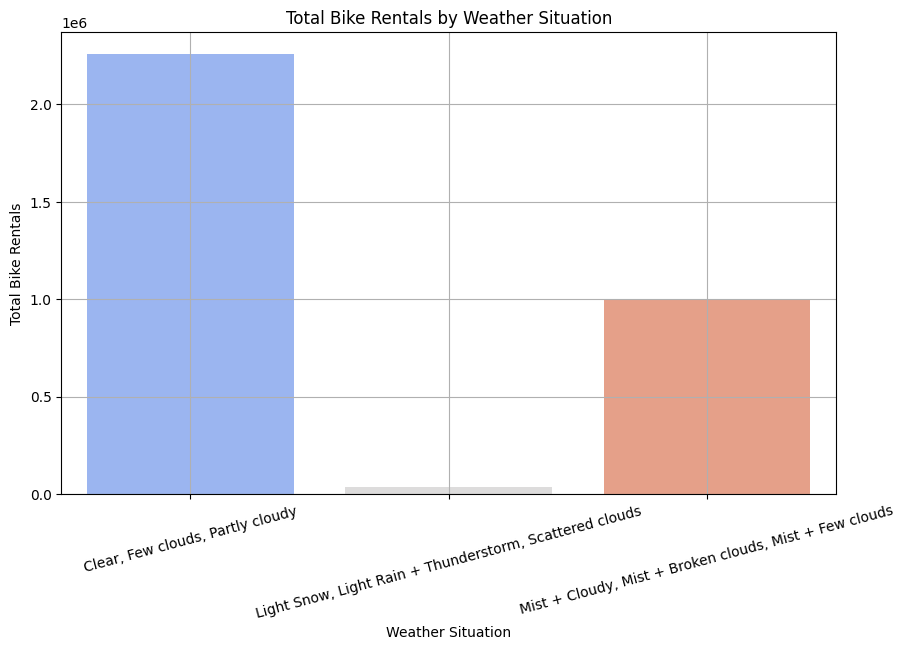

In [9]:
# Visualizing the total number of rentals by weather situation
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_condition', y='cnt', data=weather_counts, palette='coolwarm') # Changed x to 'weather_condition'

plt.title('Total Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=15)  # Rotate x-ticks for better visibility
plt.grid(True)
plt.show()

<ipython-input-10-80b976cc80ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_status', y='cnt', data=holiday_counts, palette='Set2') # Changed x to 'holiday_status'
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


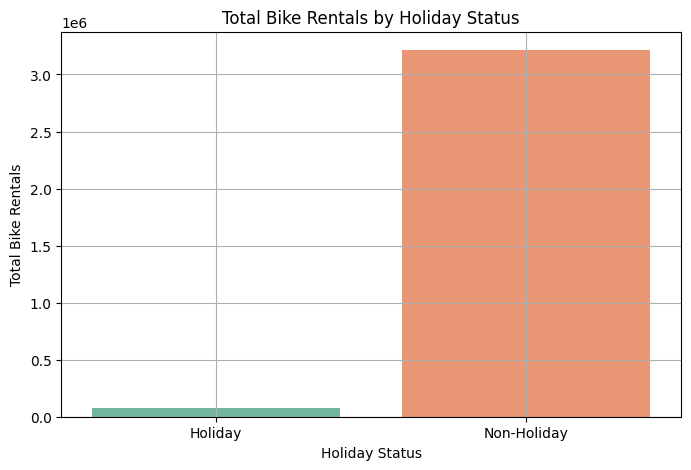

In [10]:
# Visualizing the total number of rentals by holiday status
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_status', y='cnt', data=holiday_counts, palette='Set2') # Changed x to 'holiday_status'

plt.title('Total Bike Rentals by Holiday Status')
plt.xlabel('Holiday Status')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=0)  # Rotate x-ticks for better visibility
plt.grid(True)
plt.show()

<ipython-input-11-07f62fe878d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='cnt', data=weekday_counts, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

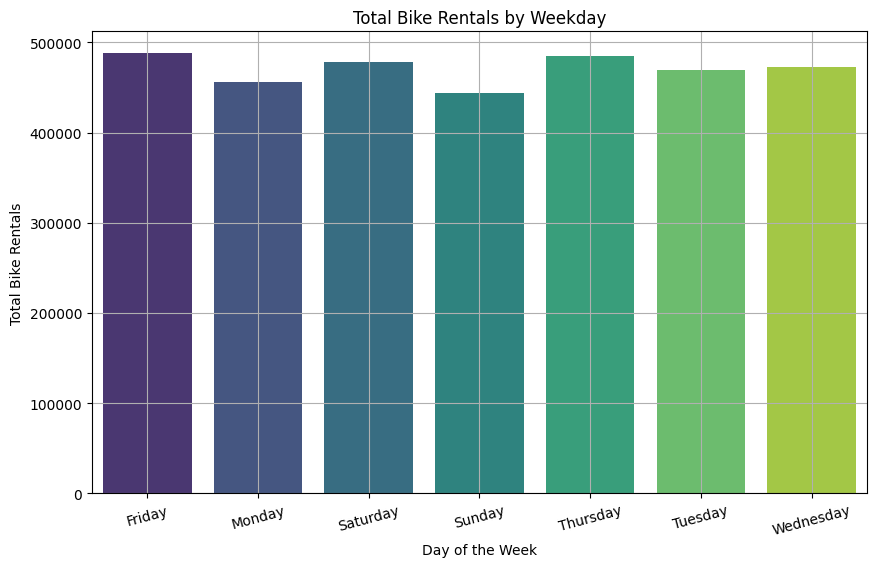

In [11]:
# Visualizing the total number of rentals by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='cnt', data=weekday_counts, palette='viridis')

plt.title('Total Bike Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=15)  # Rotate x-ticks for better visibility
plt.grid(True)
plt.show()

### Pertanyaan 1:

Is there a significant correlation between season and the number of bike rentals?
During the fall season, people rent bikes more compared to other seasons, whereas in the spring season, people tend to rent bikes less.

### Pertanyaan 2:

Does clear, cloudy, rainy, or snowy weather significantly affect the number of bike rentals?
Yes, during clear, few clouds, and partly cloudy conditions, people use bikes a lot, whereas almost no one uses bikes during light snow, light rain with thunderstorms, and scattered clouds.

### Pertanyaan 3:

Does a holiday significantly affect the number of bike rentals?
Yes, there is a very significant difference between holidays and non-holidays; fewer people rent bikes during holidays, whereas many people rent bikes during non-holidays.


### Pertanyaan 4:

How does the day of the week impact the number of bike rentals?
The number of people renting bikes each day is almost the same, but the highest rentals occur on Fridays, while the lowest rentals occur on Mondays.

**Insight:**
People rent bikes more during the fall compared to other seasons. They prefer to rent bikes when the weather is clear, with few clouds, or partly cloudy. Many people rent bikes on non-holidays, as evidenced by the highest rentals on Fridays and the lowest on Mondays.

## Analisis Lanjutan (Opsional)

## Conclusion

- People rent bikes more during the fall compared to other seasons
- People prefer to rent bikes when the weather is clear, with few clouds, or partly cloudy
- Many people rent bikes on non-holidays
- The highest rentals on Fridays and the lowest on Mondays.